In [1]:
# import lib
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load data set
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


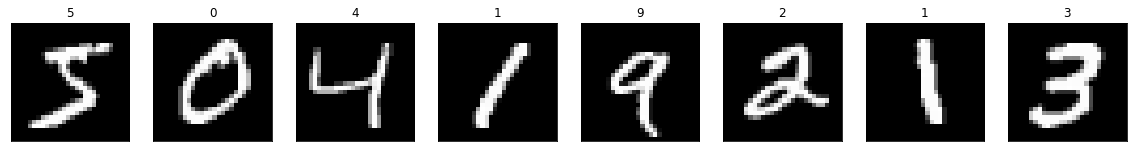

In [3]:
# show some digit
plt.figure(figsize=(20,10))
for i in range(8):
  plt.subplot(1, 8, i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(y_train[i])
  plt.xticks([])
  plt.yticks([])
  


[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


(0.0, 9.0)

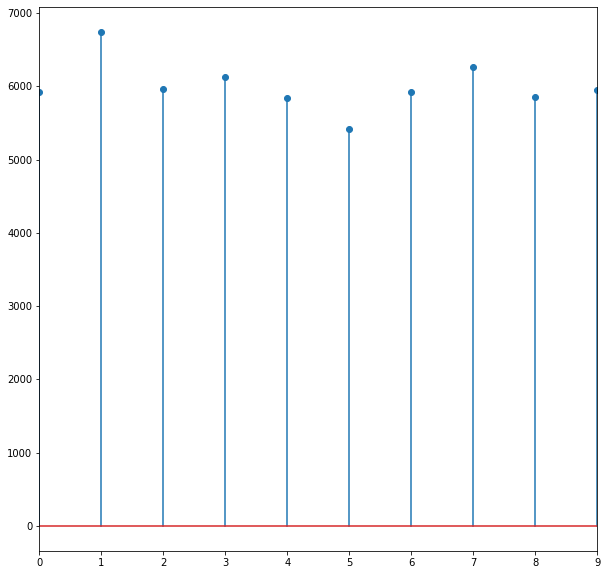

In [4]:
# number of each digit
number = [0 for i in range(10)]
for i in y_train:
  number[i] += 1
print(number)
plt.figure(figsize=(10,10))
plt.stem(number)
plt.xlim((0,9))

  

In [5]:
# normalaize
x_train = x_train.astype(float) / 255.
x_test = x_test.astype(float) / 255.

In [6]:
# normalaize
num_class = 10
y_train = keras.utils.to_categorical(y_train, num_class)
y_test = keras.utils.to_categorical(y_test, num_class)

In [7]:
# MLP neuron
model = keras.Sequential()
model.add(keras.layers.Input(shape=x_train[0].shape))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=512, activation='relu'))
model.add(keras.layers.Dense(units=10, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [8]:
# compile model
model.compile(loss='mse', optimizer='adam')

In [9]:
# train the model
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    batch_size=100,
                    epochs=20,
                    shuffle=True)

Epoch 1/20
600/600 [==============================] - 8s 13ms/step - loss: 0.0184 - val_loss: 0.0087
Epoch 2/20
600/600 [==============================] - 8s 14ms/step - loss: 0.0071 - val_loss: 0.0059
Epoch 3/20
600/600 [==============================] - 7s 11ms/step - loss: 0.0050 - val_loss: 0.0052
Epoch 4/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0038 - val_loss: 0.0044
Epoch 5/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0031 - val_loss: 0.0040
Epoch 6/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0025 - val_loss: 0.0038
Epoch 7/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0021 - val_loss: 0.0037
Epoch 8/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0017 - val_loss: 0.0034
Epoch 9/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0014 - val_loss: 0.0034
Epoch 10/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0013 - val_loss: 0.0

test:7
predict:7


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


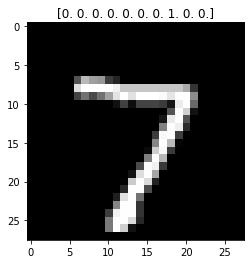

test:2
predict:2


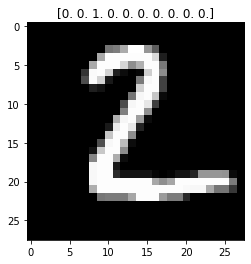

test:1
predict:1


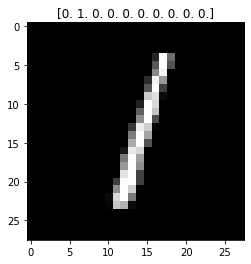

test:0
predict:0


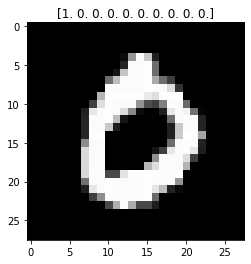

test:4
predict:4


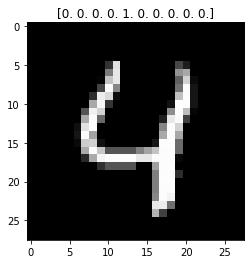

test:1
predict:1


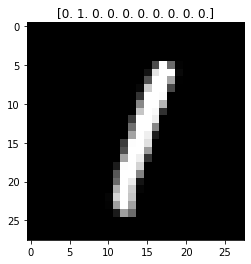

test:4
predict:4


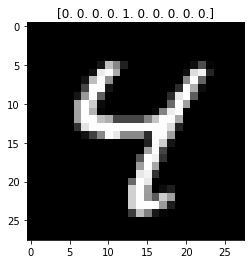

test:9
predict:9


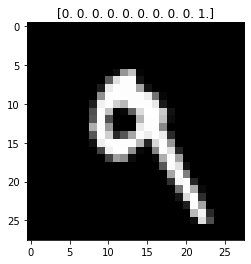

In [10]:
# showe result
y_predict = model.predict(x_test)
for i in range(8):
  print(f'test:{np.argmax(y_test[i])}')
  print(f'predict:{np.argmax(y_predict[i])}')
  plt.imshow(x_test[i], cmap='gray')
  plt.title(y_test[i])
  plt.show()

In [11]:
# accuracy
accuracy = np.average(np.argmax(y_predict, axis=1) == np.argmax(y_test, axis=1)) * 100
print(f'accuracy is {accuracy}%')

accuracy is 98.39%
